# Data Setup & Cleaning: 
Merge the movies and Netflix datasets on movie titles

In [1]:
# Import statements
import pandas as pd

In [2]:
# Load the imdb movie ratings dataset
movie_ratings = pd.read_csv("IMDb ratings.csv")
movie_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [3]:
# Select the imdb title ID and weighted average vote column
# movie_rating = movie_ratings.iloc[:, 0:2]
# movie_rating.columns = ["imdb_title_id", "Movie Ratings"]
# movie_rating.set_index("imdb_title_id", inplace=True)
# movie_rating.head()
movie_ratings.drop(movie_ratings.iloc[:, 2:], axis = 1, inplace = True)
movie_ratings.columns = ["imdb_title_id","Movie Ratings"]
movie_ratings.set_index("imdb_title_id", inplace=True)
movie_ratings.head(2)

,Movie Ratings
imdb_title_id,
tt0000009,5.9
tt0000574,6.1


In [4]:
# Load the imdb movies dataset
movies = pd.read_csv("IMDb movies.csv")
movies.head(2)

C:\Users\Sarah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [5]:
# Drop useless columns and keep only imdb ID and title
# movie_title = movies.iloc[:, 0:2]
# movie_title.set_index("imdb_title_id", inplace=True)
# movie_title.head(2)
movies.drop(movies.iloc[:, 2:], axis = 1, inplace = True)
movies.set_index("imdb_title_id", inplace=True)
movies.head(2)

,title
imdb_title_id,
tt0000009,Miss Jerry
tt0000574,The Story of the Kelly Gang


In [6]:
# Merge the two dataframes (automatically merges on index)
movie_ratings_df = movies.join(movie_ratings, how="inner")
movie_ratings_df.head()

,title,Movie Ratings
imdb_title_id,,
tt0000009,Miss Jerry,5.9
tt0000574,The Story of the Kelly Gang,6.1
tt0001892,Den sorte drøm,5.8
tt0002101,Cleopatra,5.2
tt0002130,L'Inferno,7.0


In [7]:
# Set title as the index so that it will be easier to merge
movie_ratings_df.set_index("title", inplace=True)

In [8]:
# this is the final movie data set with ratings, ready to be merged with Netflix
movie_ratings_df.head()

,Movie Ratings
title,
Miss Jerry,5.9
The Story of the Kelly Gang,6.1
Den sorte drøm,5.8
Cleopatra,5.2
L'Inferno,7.0


In [9]:
# Check for missing values
sum(movie_ratings_df['Movie Ratings'].isnull())

0

In [10]:
# Check the shape of our new dataset - it is the same with the previous ones
movie_ratings_df.shape

(85855, 1)

In [11]:
# Now that we have our dataframe with movies and their ratings, we can merge it with the Netflix dataset
# import the netflix dataset
netflix = pd.read_csv("netflix_titles.csv")
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [12]:
netflix.shape

(8807, 12)

In [13]:
# Next we will create a dataframe that contains only the movies from Netflix; the rows will reduce from 8807 to 6131
netflix_movies = netflix[netflix['type']=='Movie']
netflix_movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [14]:
netflix_movies.shape

(6131, 12)

In [15]:
#netflix_movies[netflix_movies['title'].str.startswith("The Kissing Booth")]
# for i in range (len(netflix_movies)):
#     for j in range (len(movie_ratings_df)):     

In [16]:
netflix_movies.set_index("title", inplace=True)
netflix_movies.head(2)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,
Dick Johnson Is Dead,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
My Little Pony: A New Generation,s7,Movie,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [17]:
# key = movie_ratings_df['title'].str.extract('^(' + '|'.join(netflix_movies['title']) + ')')
#df3 = df1.merge(df2.assign(key=key), left_on='A', right_on='key').drop('key', 1)

In [18]:
# Merge the netflix movies with the other movies dataset to get the ratings
# netflix_ratings = netflix_movies.join(movie_ratings_df, how="left")
netflix_ratings = pd.merge(left = netflix_movies, right = movie_ratings_df, how = 'inner', on = 'title')
netflix_ratings.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie Ratings
title,,,,,,,,,,,,
Sankofa,s8,Movie,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",6.9
Jeans,s25,Movie,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,6.5
Paranoia,s30,Movie,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",6.3
Paranoia,s30,Movie,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",4.9
Training Day,s49,Movie,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,"September 16, 2021",2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...,7.7


In [19]:
# We can see after performoing an inner join, our dataset is reduced to 2592 rows 
# because not all movies in netflix were in the imdb dataset
# We see not all movie ratings got transferred
netflix_ratings.shape

(2592, 12)

In [20]:
# Check the total missing values for the column in movie_ratings.  
sum(netflix_ratings['Movie Ratings'].isnull())

0

In [21]:
# Check for duplicate columns. We see the lenght is 2143 for unique index, whereas above is 2592 which indicates 
# some movies are repeated and we can see this above as well where Paranoia is mentioned twice
netflix_ratings.index.unique()

Index(['Sankofa', 'Jeans', 'Paranoia', 'Training Day', 'King of Boys', 'Prey',
       'Paradise Hills', 'Angamaly Diaries', 'Worth', 'Anjaam',
       ...
       'Yes or No 2.5', 'You Can Tutu', 'You Changed My Life', 'Young Adult',
       'Zed Plus', 'Zenda', 'Zinzana', 'Zodiac', 'Zoom', 'Zubaan'],
      dtype='object', name='title', length=2143)

In [22]:
netflix_ratings.reset_index(inplace=True)

In [23]:
# netflix_ratings = netflix_ratings[netflix_ratings.index.unique()]
# Keeps the first title it encounters and sets the rest as duplicates
netflix_ratings.drop_duplicates(subset = "title",
                     keep = 'first', inplace = True)

In [24]:
# Our final dataset without duplicates have rows of 2143
netflix_ratings.shape

(2143, 13)

In [25]:
# reset the index as title
netflix_ratings.set_index("title", inplace=True)

In [26]:
netflix_ratings.head(2)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie Ratings
title,,,,,,,,,,,,
Sankofa,s8,Movie,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",6.9
Jeans,s25,Movie,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,6.5


In [27]:
# sum(netflix_ratings['Movie Ratings'].isnull())
# To see whcih columns have null values. For these, we can simply insert no information avalaible
# For the rating column, since there is only one missing value, we can get rid of this row
netflix_ratings.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id           0
type              0
director         12
cast             31
country          32
date_added        0
release_year      0
rating            1
duration          0
listed_in         0
description       0
Movie Ratings     0
dtype: int64

In [28]:
# Drop the missing row for rating and use fillna for the rest of the columns
netflix_ratings.director.fillna("No Director", inplace=True)
netflix_ratings.cast.fillna("No Cast Info", inplace=True)
netflix_ratings.country.fillna("No Information", inplace=True)
netflix_ratings.dropna(subset=["rating"], inplace=True)

In [29]:
# Check to confirm no missing rows
netflix_ratings.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id          0
type             0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
Movie Ratings    0
dtype: int64

In [30]:
# Drop useless columns: show_id, type, description
netflix_ratings.drop(netflix_ratings.loc[:,("show_id", "type", "date_added", "description")], axis = 1, inplace = True)

In [31]:
netflix_ratings.head()

,director,cast,country,release_year,rating,duration,listed_in,Movie Ratings
title,,,,,,,,
Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",6.9
Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",6.5
Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2013,PG-13,106 min,Thrillers,6.3
Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,2001,R,122 min,"Dramas, Thrillers",7.7
King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2018,TV-MA,182 min,"Dramas, International Movies",5.8


In [32]:
# Change the cast column to number of popular cast
netflix_ratings["cast"] = netflix_ratings["cast"].apply(lambda x: len(x.split(",")))

# Get the first genre listed in 'listed_in' 
netflix_ratings["listed_in"] = netflix_ratings["listed_in"].apply(lambda x: x.split(",")[0])


In [33]:
netflix_ratings.head()

,director,cast,country,release_year,rating,duration,listed_in,Movie Ratings
title,,,,,,,,
Sankofa,Haile Gerima,8,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,Dramas,6.9
Jeans,S. Shankar,4,India,1998,TV-14,166 min,Comedies,6.5
Paranoia,Robert Luketic,10,"United States, India, France",2013,PG-13,106 min,Thrillers,6.3
Training Day,Antoine Fuqua,11,United States,2001,R,122 min,Dramas,7.7
King of Boys,Kemi Adetiba,8,Nigeria,2018,TV-MA,182 min,Dramas,5.8


In [34]:
# Rename columns
netflix_ratings.rename(columns = {'cast':'Popular_Actors'}, inplace = True)
netflix_ratings.rename(columns = {'listed_in':'Genre'}, inplace = True)
netflix_ratings.rename(columns = {'director':'Director'}, inplace = True)
netflix_ratings.rename(columns = {'country':'Country'}, inplace = True)
netflix_ratings.rename(columns = {'release_year':'Release_Year'}, inplace = True)
netflix_ratings.rename(columns = {'rating':'TV_Rating'}, inplace = True)
netflix_ratings.rename(columns = {'duration':'Duration_Mins'}, inplace = True)

In [35]:
netflix_ratings.reset_index(inplace=True)

In [36]:
netflix_ratings.rename(columns = {'title':'Title'}, inplace = True)
# reset the index as title
netflix_ratings.set_index("Title", inplace=True)

In [37]:
# Select the first country only in a list of countries
netflix_ratings["Country"] = netflix_ratings["Country"].apply(lambda x: x.split(",")[0])

# Get only one director per row (select the first person listed in cases where mre than one)
netflix_ratings["Director"] = netflix_ratings["Director"].apply(lambda x: x.split(",")[0])

# Change the Duration Column to have only the minutes values as integers
netflix_ratings["Duration_Mins"] = netflix_ratings["Duration_Mins"].apply(lambda x: int(x.split(" ")[0]))

netflix_ratings.head(2)

,Director,Popular_Actors,Country,Release_Year,TV_Rating,Duration_Mins,Genre,Movie Ratings
Title,,,,,,,,
Sankofa,Haile Gerima,8,United States,1993,TV-MA,125,Dramas,6.9
Jeans,S. Shankar,4,India,1998,TV-14,166,Comedies,6.5


In [38]:
# Make the Movie Ratings column binary with movies >= 6.5 = popular(1); movies < 6.5 = Not Popular (0)
def popular(x):
    if x < 6.5:
        x =  0
    else:
        x = 1
    return x

In [39]:
netflix_ratings["Movie Ratings"] = netflix_ratings["Movie Ratings"].apply(lambda x: popular(x))

In [40]:
netflix_ratings.rename(columns = {'Movie Ratings':'Popular'}, inplace = True)

In [41]:
netflix_ratings.head()

,Director,Popular_Actors,Country,Release_Year,TV_Rating,Duration_Mins,Genre,Popular
Title,,,,,,,,
Sankofa,Haile Gerima,8,United States,1993,TV-MA,125,Dramas,1
Jeans,S. Shankar,4,India,1998,TV-14,166,Comedies,1
Paranoia,Robert Luketic,10,United States,2013,PG-13,106,Thrillers,0
Training Day,Antoine Fuqua,11,United States,2001,R,122,Dramas,1
King of Boys,Kemi Adetiba,8,Nigeria,2018,TV-MA,182,Dramas,0


In [42]:
# Get rid of spaces in the columns Title, Director, Country, and Genre to insert into WEKA without errors
# netflix_ratings["Title"] = netflix_ratings["Title"].apply(lambda x: x.replace(" ", ""))
# netflix_ratings["Director"] = netflix_ratings["Director"].apply(lambda x: x.replace(" ", ""))
# netflix_ratings["Country"] = netflix_ratings["Country"].apply(lambda x: x.replace(" ", ""))
# netflix_ratings["Genre"] = netflix_ratings["Genre"].apply(lambda x: x.replace(" ", ""))
# netflix_ratings.head()

In [45]:
# !pip install rpy2

In [54]:
# %load_ext rpy2.ipython

In [53]:
# %%R 
# install.packages("foreign")
# library(foreign)
# library(data.table)
# a<-fread("Netflix_Ratings.csv")
# write.arff(a,file="netflix_ratings")

In [43]:
# Save dataframe to a csv file (Final dataframe we will be using for building models in WEKA)
netflix_ratings.to_csv('Netflix_Ratings.csv')

# Netflix Data Analysis

In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Data Cleaning and Setting

In [45]:
# import the original Netflix dataset
netflix = pd.read_csv("netflix_titles.csv")
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [46]:
# Check to see missing rows
netflix.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [47]:
# Drop the rows for raings and duratio  since not that many
# Use fillna to replace the NAn values with suitable words
netflix.director.fillna("No Director", inplace=True)
netflix.cast.fillna("No Cast Info", inplace=True)
netflix.country.fillna("No Information", inplace=True)
netflix.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [48]:
# Check to confirm no missing rows
netflix.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Which country produces the most content on Netflix?

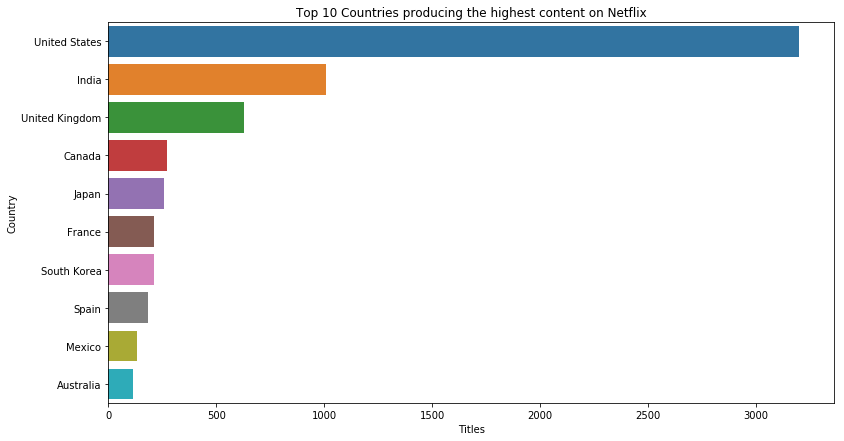

In [49]:
# Which country produces the most content on Netflix
# Clearly we can see it is the United States
# countries = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
# countries = countries[countries != 'No Information']

countries = netflix["country"].apply(lambda x: x.split(",")[0])
countries = countries[countries != 'No Information']

plt.figure(figsize=(13,7))
sns.countplot(y = countries, order=countries.value_counts().index[:10])
plt.title("Top 10 Countries producing the highest content on Netflix")
plt.xlabel("Titles")
plt.ylabel("Country")
plt.show()

In [50]:
min(netflix_movies["release_year"])

1942

What is the oldest show/movie on Netflix?

In [51]:
# What is the oldest show/movie on Netflix
netflix_movies = netflix[netflix['type']=='Movie']
netflix_shows = netflix[netflix['type']=='TV Show']
#netflix_movies["title"][netflix_movies["release_year"]== min(netflix_movies["release_year"])]

In [52]:
# The oldest movies on Netflix
# We can see therewere two movies made that year; both their dates are the same
# Probably same movie woth different title
netflix_movies[netflix_movies["release_year"]==min(netflix_movies["release_year"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,No Cast Info,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [53]:
# The oldest show on Netflix
netflix_shows[netflix_shows["release_year"]==min(netflix_shows["release_year"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,No Director,No Cast Info,No Information,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


Which category is more popular: TV Show or Movies?

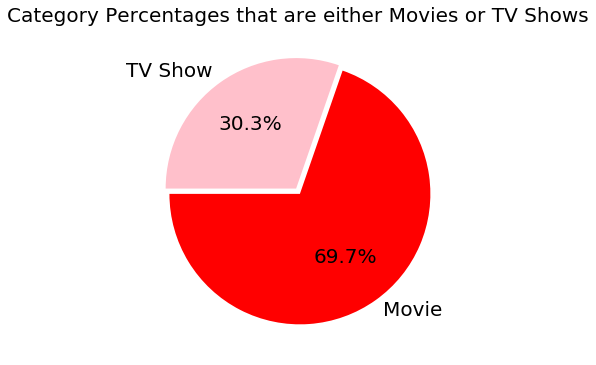

In [54]:
# We can see 30.3% of Netflix content is TV shows and the majority (69.7%) is movies
# The TV show make up less than half of the whole content that's produced on Netflix
plt.figure(figsize=(12,6))
plt.title("Category Percentages that are either Movies or TV Shows", size =20)
g = plt.pie(netflix.type.value_counts(),explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['red','pink'],autopct='%1.1f%%', startangle=180, textprops={'fontsize': 20, 'color': "black"})
plt.show()

Which category produces more content yearly on Netflix?

In [55]:
# We will be looking at the date_added column as we want to explore how often Netflix adds content (and which category)
# The date_added year starts from 2008 as per our dataset
netflix.year_added = pd.DatetimeIndex(netflix.date_added).year
netflix_movies.year_added = pd.DatetimeIndex(netflix_movies.date_added).year
netflix_shows.year_added = pd.DatetimeIndex(netflix_shows.date_added).year

C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [56]:
netflix_year = netflix.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

movies_year = netflix_movies.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

shows_year = netflix_shows.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})


In [57]:
# Sort the values in each dataframe
netflix_year.sort_values(by = ["year"], axis = 0, inplace = True)
movies_year.sort_values(by = ["year"], axis = 0, inplace = True)
shows_year.sort_values(by = ["year"], axis = 0, inplace = True)

In [58]:
# Reset the index for each dataframe
netflix_year.set_index('year', inplace=True)
movies_year.set_index('year', inplace=True)
shows_year.set_index('year', inplace=True)

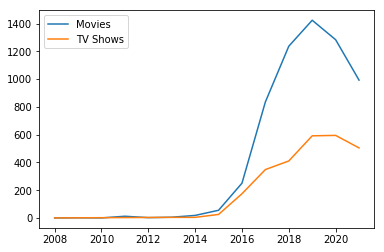

In [59]:
# We can see clearly that the Movie category produces more content on Netflix
# plt.plot(netflix_year, label = "Total")
plt.plot(movies_year, label = "Movies")
plt.plot(shows_year, label = "TV Shows")
plt.legend(loc="upper left")

- Find the movie with the longest duration on Netflix
- FInd the show with the highest number of seasons on Netflix

In [60]:
# Check the dataset to see how the duration column looks like
netflix_movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast Info,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Information,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [61]:
# We see the duration column is string. We need to get the first element whihc is the actual mins like 90 only
type(netflix_movies["duration"][0])

str

In [62]:
netflix_movies["duration"] = netflix_movies["duration"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
# Change the column name for our understanding
netflix_movies.rename(columns = {'duration':'duration in mins'}, inplace = True)

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [64]:
# Movie with the longest duration
# We see the movie with 312 mins which is ~ 5 hours
netflix_movies[netflix_movies["duration in mins"]==max(netflix_movies["duration in mins"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration in mins,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,No Director,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [65]:
# Check the shows duration column
netflix_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Information,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [66]:
# Do the same thing we did for the netflix movies dataframe
netflix_shows["duration"] = netflix_shows["duration"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
# Change the column name for our understanding
netflix_shows.rename(columns = {'duration':'duration (seasons)' }, inplace = True)

In [68]:
# Show with the highest number of seasons
netflix_shows[netflix_shows["duration (seasons)"]==max(netflix_shows["duration (seasons)" ])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration (seasons),listed_in,description
548,s549,TV Show,Grey's Anatomy,No Director,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


Top Genre on Netflix

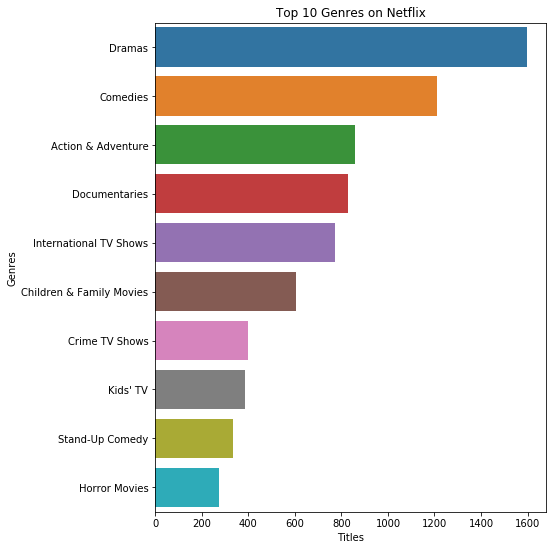

In [69]:
# The top genre is dramas
#all_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

genres = netflix["listed_in"].apply(lambda x: x.split(",")[0])

plt.figure(figsize=(7,9))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

How many Movies on Netflix are highly rated Vs Not highly rated?


In [70]:
# popular = len(netflix_ratings[netflix_ratings["Popular"] == 1])
# not_popular = len(netflix_ratings[netflix_ratings["Popular"] == 0])
# total = popular+not_popular

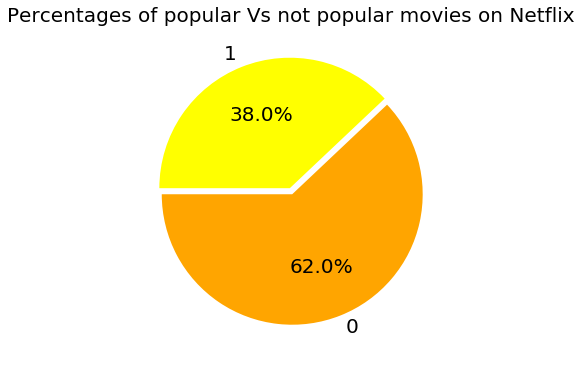

In [71]:
# Based on our dataset and our criteria (below 6.5 = not popular, above 6.5 = popular):
plt.figure(figsize=(12,6))
plt.title("Percentages of popular Vs not popular movies on Netflix", size =20)
g = plt.pie(netflix_ratings.Popular.value_counts(),explode=(0.025,0.025), labels=netflix_ratings.Popular.value_counts().index, colors=['orange','yellow'],autopct='%1.1f%%', startangle=180, textprops={'fontsize': 20, 'color': "black"})
plt.show()